In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bikesharing/hour.csv


In [2]:
import pandas as pd
path_to_csv="/kaggle/input/bikesharing/hour.csv"
hourly_data=pd.read_csv(path_to_csv)

#  Assigning Labels instead of Codes

In [3]:
season_mapping = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
year_mapping = {0: 2011, 1: 2012}
holiday_mapping = {0: 'No Holiday', 1: 'Holiday'}
weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
workingday_mapping = {0: 'No', 1: 'Yes'}
weathersit_mapping = {
  1: 'Clear, Few clouds, Partly cloudy, Partly cloudy',
  2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
  3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
  4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'
}

# Apply mappings
hourly_data['season'] = hourly_data['season'].map(season_mapping)
hourly_data['yr'] = hourly_data['yr'].map(year_mapping)
hourly_data['holiday'] = hourly_data['holiday'].map(holiday_mapping)
hourly_data['weekday'] = hourly_data['weekday'].map(weekday_mapping)
hourly_data['workingday'] = hourly_data['workingday'].map(workingday_mapping)
hourly_data['weathersit'] = hourly_data['weathersit'].map(weathersit_mapping)

print(hourly_data.head(3))

   instant      dteday  season    yr  mnth  hr     holiday   weekday  \
0        1  2011-01-01  Winter  2011     1   0  No Holiday  Saturday   
1        2  2011-01-01  Winter  2011     1   1  No Holiday  Saturday   
2        3  2011-01-01  Winter  2011     1   2  No Holiday  Saturday   

  workingday                                       weathersit  temp   atemp  \
0         No  Clear, Few clouds, Partly cloudy, Partly cloudy  0.24  0.2879   
1         No  Clear, Few clouds, Partly cloudy, Partly cloudy  0.22  0.2727   
2         No  Clear, Few clouds, Partly cloudy, Partly cloudy  0.22  0.2727   

    hum  windspeed  casual  registered  cnt  
0  0.81        0.0       3          13   16  
1  0.80        0.0       8          32   40  
2  0.80        0.0       5          27   32  


# Figure 1: Average Monthly Bike Rentals for Casual and Registered Users

      yr  mnth     casual  registered
0   2011     1   4.466570   51.040698
1   2011     2   9.617874   64.673344
2   2011     3  17.569863   70.163014
3   2011     4  31.079277  100.867872
4   2011     5  41.733871  140.821237
5   2011     6  42.516667  156.805556
6   2011     7  48.994624  140.979839
7   2011     8  39.455540  147.536252
8   2011     9  37.022315  140.687587
9   2011    10  33.946164  132.286676
10  2011    11  21.688456  120.407510
11  2011    12  11.400810  106.443995
12  2012     1  12.103914  118.454791
13  2012     2  12.602601  136.439306
14  2012     3  42.554509  179.349933
15  2012     4  53.559889  189.091922
16  2012     5  59.455645  203.803763
17  2012     6  60.130556  221.577778
18  2012     7  56.055108  217.610215
19  2012     8  58.060484  230.250000
20  2012     9  60.802778  242.770833
21  2012    10  48.782486  232.066384
22  2012    11  29.260446  183.363510
23  2012    12  17.850404  148.878706


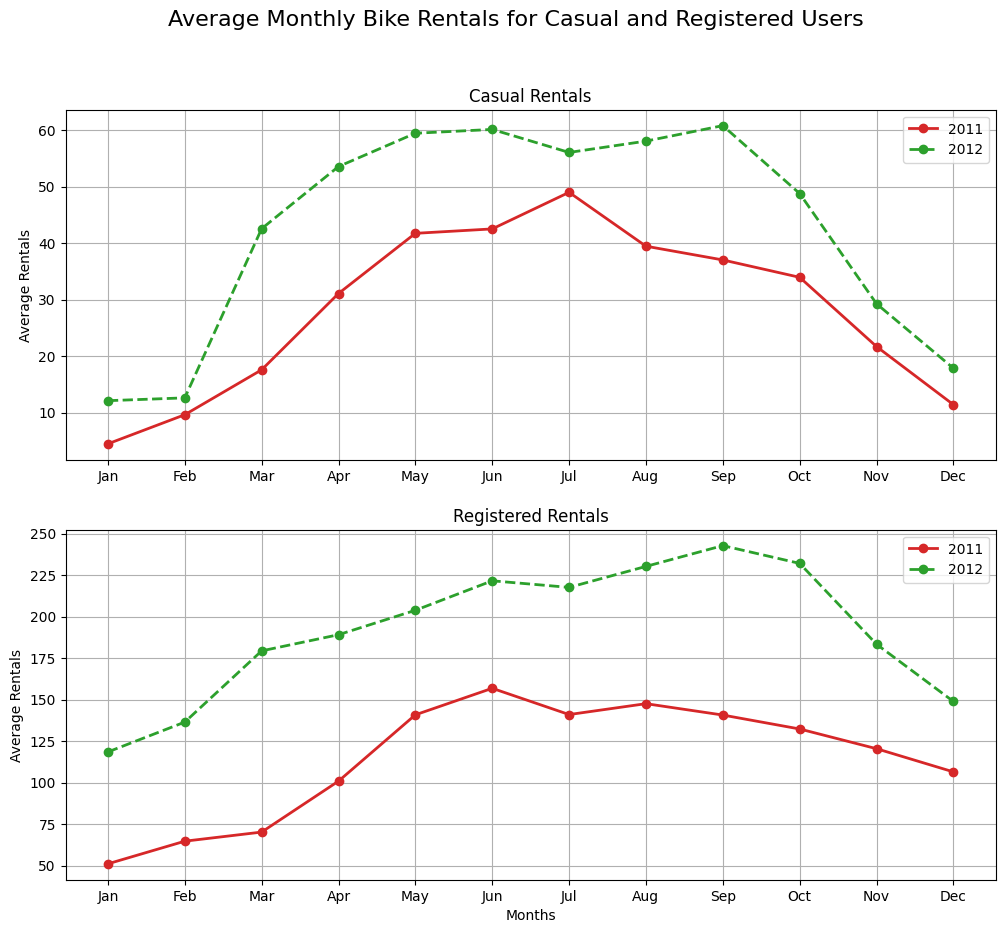

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
# Aggregating hourly data to monthly data while taking means of casual and registered rental counts
monthly_data = hourly_data.groupby(['yr', 'mnth']).agg({'casual': 'mean', 'registered': 'mean'}).reset_index()
print(monthly_data)
# Sorting the data by year and then month
monthly_data.sort_values(['yr', 'mnth'], inplace=True)

# Separating the data by year
data_2011 = monthly_data[monthly_data['yr'] == 2011]
data_2012 = monthly_data[monthly_data['yr'] == 2012]

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Creating subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 10))
fig.suptitle('Average Monthly Bike Rentals for Casual and Registered Users', fontsize=16)

# Plotting Casual Rentals
axs[0].plot(months, data_2011['casual'], label='2011', marker='o', linestyle='-', linewidth=2, color='tab:red')
axs[0].plot(months, data_2012['casual'], label='2012', marker='o', linestyle='--', linewidth=2, color='tab:green')
axs[0].set_title('Casual Rentals')
axs[0].set_ylabel('Average Rentals')
axs[0].legend()
axs[0].grid(True)

# Plotting Registered Rentals
axs[1].plot(months, data_2011['registered'], label='2011', marker='o', linestyle='-', linewidth=2, color='tab:red')
axs[1].plot(months, data_2012['registered'], label='2012', marker='o', linestyle='--', linewidth=2, color='tab:green')
axs[1].set_title('Registered Rentals')
axs[1].set_xlabel('Months')
axs[1].set_ylabel('Average Rentals')
axs[1].legend()
axs[1].grid(True)

plt.savefig('bike_rentals.png', dpi=300, bbox_inches='tight')
plt.show()


# Figure 2: Average Count of Bike Rentals vs. Temperature

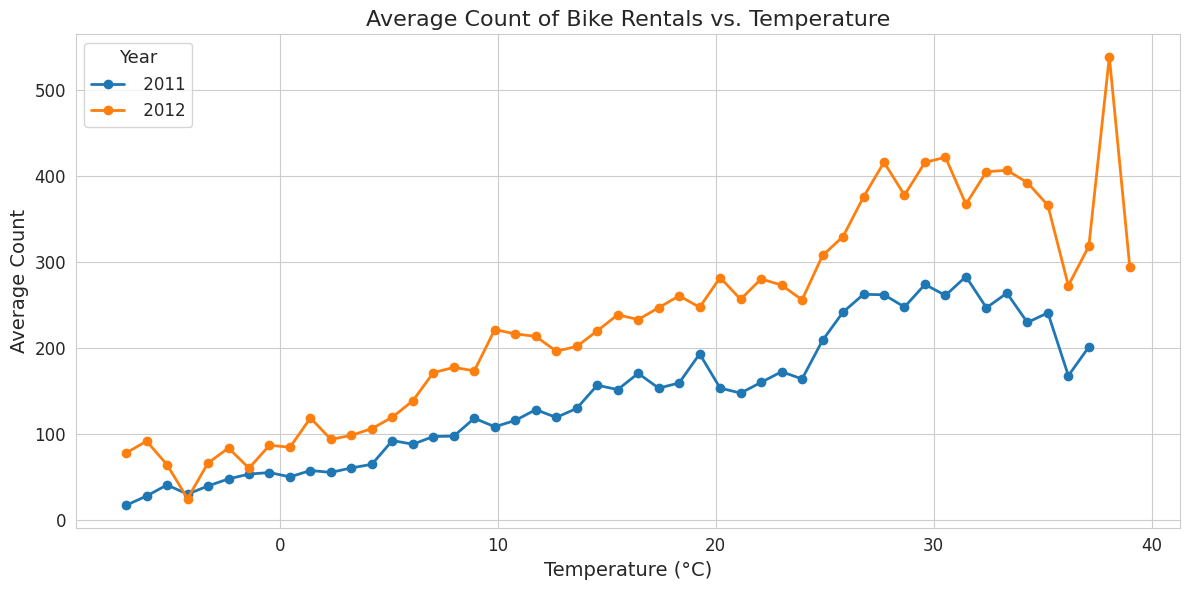

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Denormalize temperature feature
def denormalize_temp(temp_normalized, t_min=-8, t_max=39):
    return (temp_normalized * (t_max - t_min)) + t_min


# Create new feature with denormalized temp
hourly_data['temp_denorm'] = hourly_data['temp'].apply(denormalize_temp)


# Setting the aesthetic style of the plots
sns.set_style("whitegrid")


# Grouping the data by denormalized temperature and calculating mean of total users
grouped_data = hourly_data.groupby(['yr', 'temp_denorm']).agg({'cnt': 'mean'}).reset_index()

plt.figure(figsize=(12, 6))

# Plotting data for each year 
for year in grouped_data['yr'].unique():
    yearly_data = grouped_data[grouped_data['yr'] == year]
    plt.plot(yearly_data['temp_denorm'], yearly_data['cnt'], 
             marker='o', linestyle='-', linewidth=2, markersize=6, 
             label=f' {year}')

plt.xlabel('Temperature (°C)', fontsize=14)
plt.ylabel('Average Count', fontsize=14)
plt.title('Average Count of Bike Rentals vs. Temperature', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding a legend
plt.legend(title='Year', title_fontsize='13', fontsize='12')

# Displaying the plot
plt.tight_layout()
plt.savefig('cnt_temp.png', dpi=300, bbox_inches='tight')

plt.show()


# Figure 3: Average Count of Bike Rentals per Season

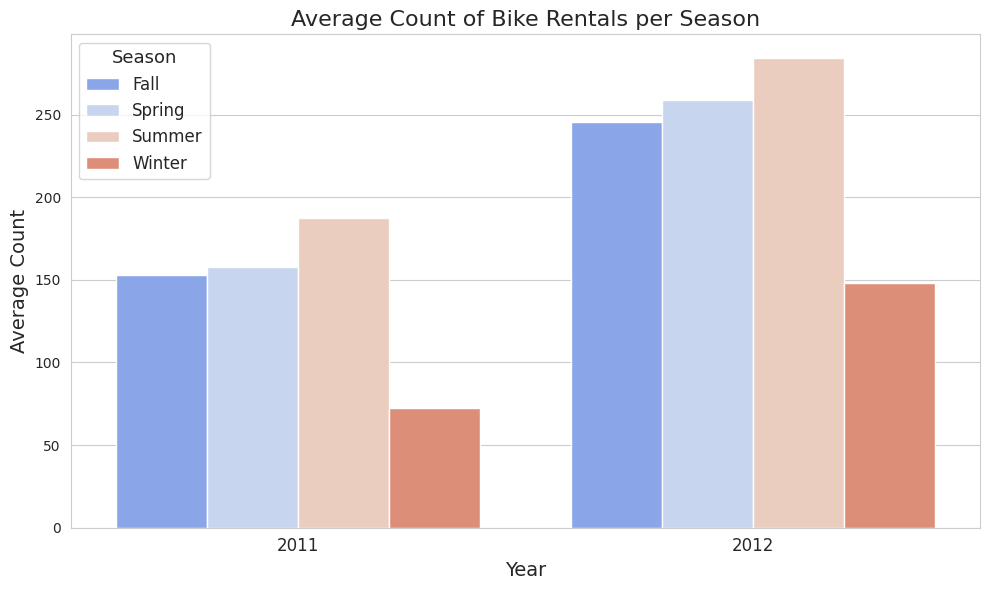

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Grouping data by season and year, then calculating the mean 'cnt'
grouped_data = hourly_data.groupby(['yr', 'season']).agg({'cnt': 'mean'}).reset_index()

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
palette = sns.color_palette("coolwarm", n_colors=4)

# bar plot
sns.barplot(x='yr', y='cnt', hue='season', data=grouped_data, palette=palette)

# Adding labels and title with font size adjustments
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Count', fontsize=14)
plt.title('Average Count of Bike Rentals per Season', fontsize=16)
plt.xticks(ticks=[0, 1], labels=['2011', '2012'], fontsize=12)
plt.legend(title='Season', title_fontsize='13', fontsize='12')

# Displaying the plot
plt.tight_layout()
plt.savefig('average_count_bike_rentals_seasonwise.png', dpi=300, bbox_inches='tight')
plt.show()


# Figure 4: Average Bike Rental Counts by Hour for Working and Non-Working Days

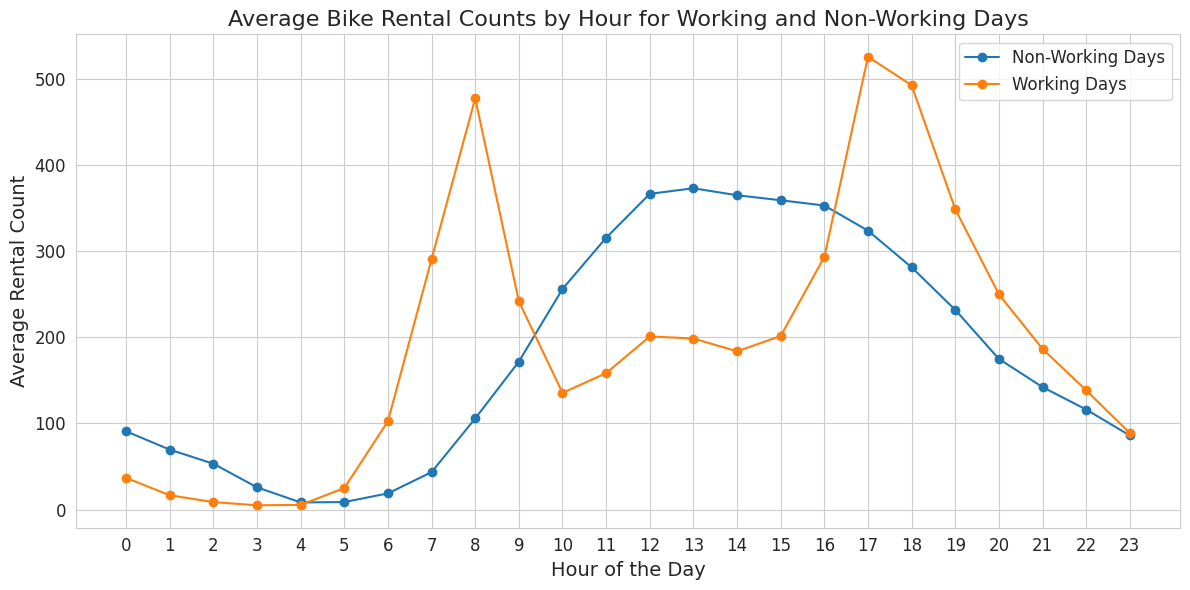

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
# Aggregate dataset by hr and workingday, taking mean of total bike rental count
hourly_workingday_grouped = hourly_data.groupby(['hr', 'workingday']).agg({'cnt': 'mean'}).reset_index()

plt.figure(figsize=(12, 6))

# Filtering data for non-working days and plotting it
non_working_days = hourly_workingday_grouped[hourly_workingday_grouped['workingday'] == 'No']
plt.plot(non_working_days['hr'], non_working_days['cnt'], label='Non-Working Days', marker='o')

# Filtering data for working days and plotting it
working_days = hourly_workingday_grouped[hourly_workingday_grouped['workingday'] == 'Yes']
plt.plot(working_days['hr'], working_days['cnt'], label='Working Days', marker='o')

# Adding titles and labels with customized font sizes
plt.title('Average Bike Rental Counts by Hour for Working and Non-Working Days', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Average Rental Count', fontsize=14)
plt.xticks(range(0, 24), fontsize=12)  # Assuming 'hr' is 0-23 for 24-hour format
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

# Displaying the plot
plt.tight_layout()
plt.savefig('bike_rentals_by_hour.png')

plt.show()

# Figure 5: Box-Plots for 'cnt, 'casual' and 'registered'

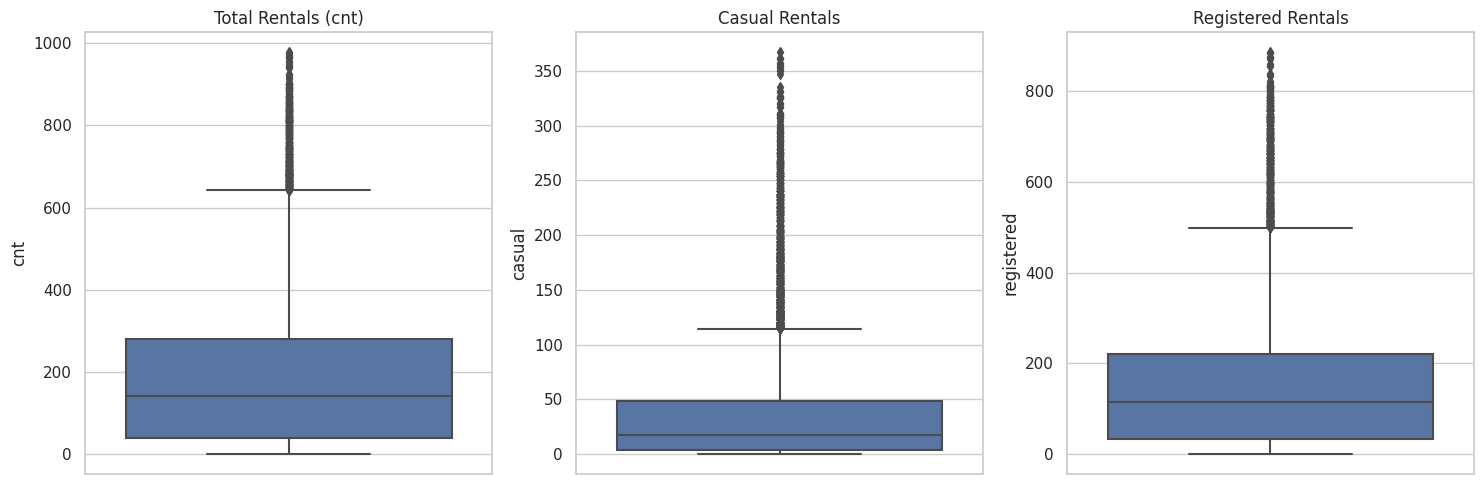

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Create boxplots
sns.boxplot(data=hourly_data, y='cnt', ax=axes[0])
axes[0].set_title('Total Rentals (cnt)')

sns.boxplot(data=hourly_data, y='casual', ax=axes[1])
axes[1].set_title('Casual Rentals')

sns.boxplot(data=hourly_data, y='registered', ax=axes[2])
axes[2].set_title('Registered Rentals')

plt.tight_layout()
plt.savefig('box_plots_cnt_casual_registered.png')

plt.show()